###Dataset Loader

In [ ]:
import pandas as pd

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
def DataLoader(link, name_of_file):
  id = link.split("/")[-2]
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(name_of_file)
  dataframe = pd.read_csv(name_of_file)
  return dataframe

In [ ]:
link = 'https://drive.google.com/file/d/1sffgl4pndZQ8xniaK6biPbDxcD_08zTJ/view?usp=sharing'
dataset = 'emo-bodysync-data.csv'

df_jazz = DataLoader(link, dataset)

In [ ]:
df_jazz.head(5)

,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,synchrony_neck_to_l_hip,...,synchrony_r_eye_to_r_ear,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,angry,disgusted,fearful,happy,neutral,sad,surprised
0,0.877340,0.853057,0.871981,0.662046,0.954243,0.861182,0.946395,0.895180,0.150769,0.962095,...,0.898557,0.908625,0.874075,0.027505,0.007242,0.001040,0.152293,0.674142,0.118742,0.019037
1,0.877261,0.854115,0.872812,0.664794,0.956122,0.860955,0.948301,0.894683,0.150166,0.963311,...,0.899367,0.909072,0.873844,0.026280,0.007045,0.000983,0.149608,0.675542,0.122299,0.018243
2,0.877076,0.855197,0.873742,0.667617,0.958027,0.860894,0.950260,0.894117,0.149572,0.964538,...,0.900206,0.909490,0.873918,0.025138,0.006853,0.000929,0.147061,0.676792,0.125747,0.017480
3,0.876797,0.856302,0.874762,0.670510,0.959952,0.860992,0.952266,0.893484,0.148984,0.965773,...,0.901071,0.909879,0.874275,0.024077,0.006665,0.000878,0.144649,0.677895,0.129086,0.016749
4,0.876439,0.857428,0.875862,0.673467,0.961890,0.861244,0.954310,0.892789,0.148405,0.967012,...,0.901960,0.910241,0.874894,0.023097,0.006482,0.000829,0.142371,0.678852,0.132320,0.016048


In [ ]:
df_jazz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   synchrony_neck_to_r_sho    4346 non-null   float64
 1   synchrony_neck_to_l_sho    4346 non-null   float64
 2   synchrony_r_sho_to_r_elb   4346 non-null   float64
 3   synchrony_r_elb_to_r_wri   4346 non-null   float64
 4   synchrony_l_sho_to_l_elb   4346 non-null   float64
 5   synchrony_l_elb_to_l_wri   4346 non-null   float64
 6   synchrony_neck_to_r_hip    4346 non-null   float64
 7   synchrony_r_hip_to_r_knee  4346 non-null   float64
 8   synchrony_r_knee_to_r_ank  4346 non-null   float64
 9   synchrony_neck_to_l_hip    4346 non-null   float64
 10  synchrony_l_hip_to_l_knee  4346 non-null   float64
 11  synchrony_l_knee_to_l_ank  4346 non-null   float64
 12  synchrony_neck_to_nose     4346 non-null   float64
 13  synchrony_nose_to_r_eye    4346 non-null   float

### Data Pre-Processing

In [ ]:
Y_df = df_jazz[["angry", "disgusted", "sad", "surprised", "happy", "fearful"]]

In [ ]:
def add(a, b, c, d, e, f):
    return a + b + c + d + e + f

def div(sum):
    return (1/sum)

In [ ]:
Y_df['add'] = Y_df.apply(lambda row : add(row['angry'], row['disgusted'], row['sad'], row['surprised'], row['happy'], row['fearful']), axis = 1)
Y_df['coeff'] = Y_df.apply(lambda row : div(row['add']), axis = 1)

<ipython-input-9-dd8b751103a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_df['add'] = Y_df.apply(lambda row : add(row['angry'], row['disgusted'], row['sad'], row['surprised'], row['happy'], row['fearful']), axis = 1)
<ipython-input-9-dd8b751103a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_df['coeff'] = Y_df.apply(lambda row : div(row['add']), axis = 1)


In [ ]:
Y_df

,angry,disgusted,sad,surprised,happy,fearful,add,coeff
0,0.027505,0.007242,0.118742,0.019037,0.152293,0.001040,0.325858,3.068822
1,0.026280,0.007045,0.122299,0.018243,0.149608,0.000983,0.324458,3.082066
2,0.025138,0.006853,0.125747,0.017480,0.147061,0.000929,0.323208,3.093986
3,0.024077,0.006665,0.129086,0.016749,0.144649,0.000878,0.322105,3.104575
4,0.023097,0.006482,0.132320,0.016048,0.142371,0.000829,0.321148,3.113830
...,...,...,...,...,...,...,...,...
4341,0.057745,0.000319,0.072633,0.004506,0.008023,-0.000540,0.142687,7.008354
4342,0.058333,0.000310,0.071518,0.004282,0.007131,-0.000625,0.140949,7.094749
4343,0.058910,0.000300,0.070388,0.004059,0.006293,-0.000707,0.139243,7.181667
4344,0.059475,0.000290,0.069245,0.003838,0.005509,-0.000786,0.137572,7.268922


In [ ]:
Y_final = Y_df[["angry", "disgusted", "sad", "surprised", "happy", "fearful"]].multiply(Y_df["coeff"], axis="index")

In [ ]:
Y_final.head(5)

,angry,disgusted,sad,surprised,happy,fearful
0,0.084408,0.022224,0.364398,0.058421,0.467359,0.003190
1,0.080996,0.021713,0.376934,0.056226,0.461101,0.003030
2,0.077776,0.021202,0.389059,0.054084,0.455003,0.002876
3,0.074750,0.020692,0.400759,0.051999,0.449074,0.002726
4,0.071921,0.020184,0.412021,0.049972,0.443320,0.002582


In [ ]:
Y_final['max_value'] = Y_final.max(axis=1)

In [ ]:
for i in range(0,4346):
  if (Y_final['angry'][i] == Y_final['max_value'][i]):
    Y_final['max_value'][i] = 'angry'
  elif (Y_final['disgusted'][i] == Y_final['max_value'][i]):
    Y_final['max_value'][i] = 'disgusted'
  elif (Y_final['sad'][i] == Y_final['max_value'][i]):
    Y_final['max_value'][i] = 'sad'
  elif (Y_final['happy'][i] == Y_final['max_value'][i]):
    Y_final['max_value'][i] = 'happy'
  elif (Y_final['fearful'][i] == Y_final['max_value'][i]):
    Y_final['max_value'][i] = 'fearful'
  else:
    Y_final['max_value'][i] = 'surprised'

In [ ]:
Y_final

,angry,disgusted,sad,surprised,happy,fearful,max_value
0,0.084408,0.022224,0.364398,0.058421,0.467359,0.003190,happy
1,0.080996,0.021713,0.376934,0.056226,0.461101,0.003030,happy
2,0.077776,0.021202,0.389059,0.054084,0.455003,0.002876,happy
3,0.074750,0.020692,0.400759,0.051999,0.449074,0.002726,happy
4,0.071921,0.020184,0.412021,0.049972,0.443320,0.002582,happy
...,...,...,...,...,...,...,...
4341,0.404697,0.002239,0.509041,0.031577,0.056227,-0.003781,sad
4342,0.413858,0.002196,0.507404,0.030378,0.050596,-0.004432,sad
4343,0.423071,0.002153,0.505504,0.029152,0.045197,-0.005076,sad
4344,0.432321,0.002109,0.503335,0.027899,0.040047,-0.005710,sad


In [ ]:
Y_final.max_value.unique()

array(['happy', 'sad', 'angry'], dtype=object)

In [ ]:
print(Y_final['max_value'].value_counts()['happy'])
print(Y_final['max_value'].value_counts()['angry'])
print(Y_final['max_value'].value_counts()['sad'])

2375
164
1807


In [ ]:
X_df = df_jazz[["synchrony_neck_to_r_sho", "synchrony_neck_to_l_sho", "synchrony_r_sho_to_r_elb", "synchrony_r_elb_to_r_wri", "synchrony_l_sho_to_l_elb", "synchrony_l_elb_to_l_wri", "synchrony_neck_to_r_hip", "synchrony_r_hip_to_r_knee", "synchrony_r_knee_to_r_ank", "synchrony_neck_to_l_hip", "synchrony_l_hip_to_l_knee", "synchrony_l_knee_to_l_ank", "synchrony_neck_to_nose", "synchrony_nose_to_r_eye", "synchrony_r_eye_to_r_ear", "synchrony_nose_to_l_eye", "synchrony_l_eye_to_l_ear"]]

In [ ]:
Y_final = Y_final.drop(['disgusted', 'sad', 'surprised','angry', 'happy', 'fearful'], axis = 1)

In [ ]:
emo_bodysync_data = pd.concat([X_df, Y_final], axis=1, join="inner")

In [ ]:
emo_bodysync_data

,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,synchrony_neck_to_l_hip,synchrony_l_hip_to_l_knee,synchrony_l_knee_to_l_ank,synchrony_neck_to_nose,synchrony_nose_to_r_eye,synchrony_r_eye_to_r_ear,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,max_value
0,0.877340,0.853057,0.871981,0.662046,0.954243,0.861182,0.946395,0.895180,0.150769,0.962095,0.792371,1.000000,0.893801,0.945616,0.898557,0.908625,0.874075,happy
1,0.877261,0.854115,0.872812,0.664794,0.956122,0.860955,0.948301,0.894683,0.150166,0.963311,0.788575,0.997554,0.894661,0.944675,0.899367,0.909072,0.873844,happy
2,0.877076,0.855197,0.873742,0.667617,0.958027,0.860894,0.950260,0.894117,0.149572,0.964538,0.784687,0.995065,0.895747,0.943693,0.900206,0.909490,0.873918,happy
3,0.876797,0.856302,0.874762,0.670510,0.959952,0.860992,0.952266,0.893484,0.148984,0.965773,0.780735,0.992531,0.897040,0.942675,0.901071,0.909879,0.874275,happy
4,0.876439,0.857428,0.875862,0.673467,0.961890,0.861244,0.954310,0.892789,0.148405,0.967012,0.776747,0.989954,0.898524,0.941626,0.901960,0.910241,0.874894,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,0.887965,0.919958,0.894809,0.794823,0.973478,0.970730,0.933932,0.884747,0.131288,0.931841,0.969665,0.682118,0.913673,0.933549,0.888526,0.930092,0.955308,sad
4342,0.887249,0.918692,0.893675,0.793834,0.974920,0.966056,0.933662,0.886374,0.131288,0.930295,0.973623,0.682118,0.914140,0.930959,0.888233,0.928244,0.953653,sad
4343,0.886463,0.917409,0.892472,0.792741,0.976493,0.960981,0.933500,0.888064,0.131288,0.928762,0.977728,0.682118,0.914680,0.928143,0.887849,0.926256,0.951880,sad
4344,0.885603,0.916109,0.891198,0.791543,0.978203,0.955495,0.933452,0.889817,0.131288,0.927242,0.981981,0.682118,0.915295,0.925096,0.887371,0.924125,0.949984,sad


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=1, n=2375 (54.648%)
Class=2, n=1807 (41.578%)
Class=0, n=164 (3.774%)


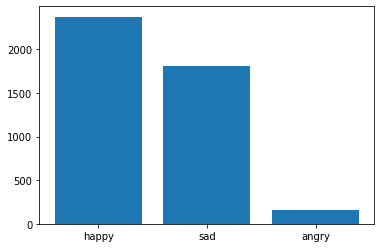

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt

y = LabelEncoder().fit_transform(Y_final)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
plt.bar(["happy", "sad", "angry"], counter.values())
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=1, n=2375 (33.333%)
Class=2, n=2375 (33.333%)
Class=0, n=2375 (33.333%)


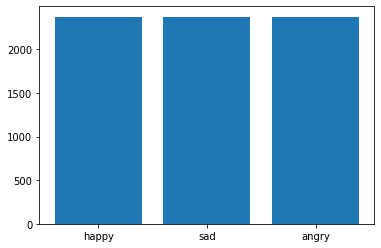

In [ ]:
from imblearn.over_sampling import SMOTE

y = LabelEncoder().fit_transform(Y_final)
oversample = SMOTE()
X, y = oversample.fit_resample(X_df, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(["happy", "sad", "angry"], counter.values())
plt.show()

In [ ]:
X_np = X_df.to_numpy()

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

data = asarray([['happy'], ['sad'], ['angry']])
print(data)
encoder = OrdinalEncoder()
Y_np = encoder.fit_transform(Y_final)
print(Y_np)

[['happy']
 ['sad']
 ['angry']]
[[1.]
 [1.]
 [1.]
 ...
 [2.]
 [2.]
 [2.]]


In [ ]:
from sklearn.model_selection import StratifiedKFold
def CrossValidation(dataX,dataY): #split the dataset into train and test using k-5 fold cross validation
  skf = StratifiedKFold(n_splits=3, random_state = None, shuffle=True) 

  for train_index, test_index in skf.split(dataX , dataY):
        X_train, X_test = dataX[train_index], dataX[test_index] 
        Y_train, Y_test = dataY[train_index], dataY[test_index]
        return X_train, X_test, Y_train, Y_test

Xtrain, Xtest, Ytrain, Ytest = CrossValidation(X_np, Y_np)

In [ ]:
Xtrain.shape 

(2897, 17)

In [ ]:
Xtest.shape

(1449, 17)

In [ ]:
Ytrain.shape

(2897, 1)

In [ ]:
Ytest.shape

(1449, 1)

### Neural Network 


In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from keras.layers import Input, Convolution1D, MaxPooling1D, Flatten, Dense, concatenate
model = Sequential()
model.add(Convolution1D(filters=32, kernel_size=3, activation='relu', input_shape=(17,1)))
model.add(Convolution1D(filters=64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(Xtrain, Ytrain, batch_size=100, epochs=20)

Epoch 1/20
29/29 [==============================] - 11s 7ms/step - loss: -2.0046 - accuracy: 0.5299
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: -68.3158 - accuracy: 0.5464
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: -806.0183 - accuracy: 0.5464
Epoch 4/20
29/29 [==============================] - 0s 4ms/step - loss: -5055.1948 - accuracy: 0.5464
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: -22472.3320 - accuracy: 0.5464
Epoch 6/20
29/29 [==============================] - 0s 5ms/step - loss: -71686.9844 - accuracy: 0.5464
Epoch 7/20
29/29 [==============================] - 0s 4ms/step - loss: -192442.1719 - accuracy: 0.5464
Epoch 8/20
29/29 [==============================] - 0s 4ms/step - loss: -443613.0625 - accuracy: 0.5464
Epoch 9/20
29/29 [==============================] - 0s 4ms/step - loss: -915787.3750 - accuracy: 0.5464
Epoch 10/20
29/29 [==============================] - 0s 4ms/step - loss: -17414

In [ ]:
accuracy = model.evaluate(Xtest, Ytest, batch_size=100)
print(accuracy)

15/15 [==============================] - 0s 5ms/step - loss: -104011040.0000 - accuracy: 0.5466
[-104011040.0, 0.5465838313102722]


In [ ]:
from sklearn.metrics import accuracy_score

yhat = model.predict(Xtest)
score = accuracy_score(Ytest, yhat)
print('Accuracy: %.5f' % score)

46/46 [==============================] - 0s 2ms/step
Accuracy: 0.54658


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=Ytest, y_pred=yhat)

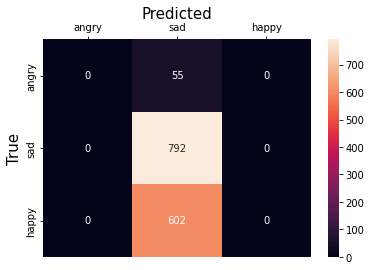

In [ ]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['angry', 'sad', 'happy'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(['angry', 'sad', 'happy'], fontsize = 10)
plt.show()

### Machine Learning